In [1]:
from input import *

In [2]:
from sectionproperties.pre.library import circular_section, rectangular_section

import concreteproperties.stress_strain_profile as ssp
from concreteproperties import (
    Concrete,
    ConcreteSection,
    SteelBar,
    add_bar_rectangular_array,
)
from concreteproperties.results import MomentCurvatureResults

In [3]:
conc_linear_no_tension = Concrete(
    name="Linear-elastisch ideal-plastisch Beton ohne Zugfestigkeit",
    density=2.4e-6,
    stress_strain_profile=ssp.ConcreteLinearNoTension(
        elastic_modulus=36011, ultimate_strain=0.003, compressive_strength=35,
    ),
    ultimate_stress_strain_profile=ssp.BilinearStressStrain(
        compressive_strength=35,
        compressive_strain=35/36011,
        ultimate_strain=-0.003,
    ),
    flexural_tensile_strength=3.9,
    colour="lightgrey",
)

conc_linear_tension = Concrete(
    name="Linear-elastisch ideal-plastisch Beton",
    density=2.4e-6,
    stress_strain_profile=ssp.ConcreteServiceProfile(
        strains=[-35 / 36011, -4 / 36011, -3.9 / 36011, 0, 35 / 36011, 0.003],
        stresses=[0, 0, -3.9, 0, 35, 35],
        ultimate_strain=0.003,
    ),
    ultimate_stress_strain_profile=ssp.BilinearStressStrain(
        compressive_strength=35,
        compressive_strain=35/36011,
        ultimate_strain=-0.003,
    ),
    flexural_tensile_strength=3.9,
    colour="lightgrey",
)





Bst550 = SteelBar(
    name="Linear-elastisch linear-plastisch Bst550",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelHardening(
        yield_strength=550,
        elastic_modulus=205e3,
        fracture_strain=0.05,
        ultimate_strength=715
    ),
    colour="grey",
)

SAS670 = SteelBar(
    name="Linear-elastisch linear-plastisch SAS670",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelHardening(
        yield_strength=670,
        elastic_modulus=205e3,
        fracture_strain=0.05,
        ultimate_strength=800
    ),
    colour="grey",
)

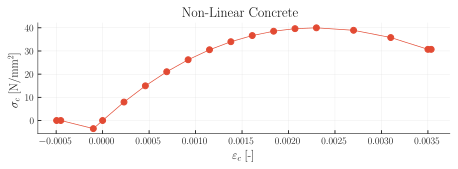

In [4]:
ax_sigma_eps = conc_linear_no_tension.stress_strain_profile.plot_stress_strain(title=conc_linear_no_tension.name,render=False)

ax_sigma_eps.set_xlabel('$\\varepsilon_c$ [-]')
ax_sigma_eps.set_ylabel('$\\sigma_c$ [N/mm$^2$]')


plt.show()

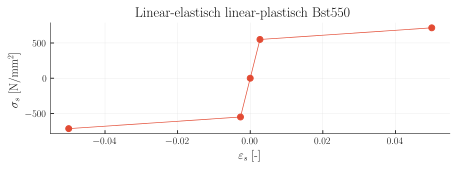

In [5]:
ax_steel = Bst550.stress_strain_profile.plot_stress_strain(Bst550.name, render = False)
ax_steel.set_xlabel('$\\varepsilon_s$ [-]')
ax_steel.set_ylabel('$\\sigma_s$ [N/mm$^2$]')

plt.show()

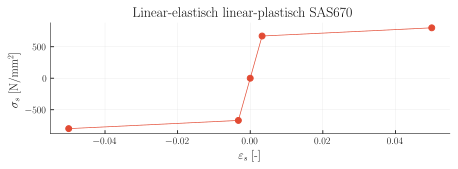

In [6]:
ax_steel = SAS670.stress_strain_profile.plot_stress_strain(SAS670.name, render = False)
ax_steel.set_xlabel('$\\varepsilon_s$ [-]')
ax_steel.set_ylabel('$\\sigma_s$ [N/mm$^2$]')

plt.show()

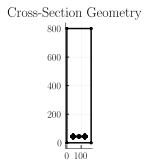

In [7]:
col = rectangular_section(d=800, b=170)

# add bars to column
geom = add_bar_rectangular_array(
    geometry=col,
    area=18**2/4*3.14,
    material=SAS670,
    n_x=2,
    x_s=170-2*44,
    n_y=1,
    y_s=0,
    anchor=(44, 44),
    exterior_only=True,
)

geom = add_bar_rectangular_array(
    geometry=geom,
    area=12**2/4*3.14,
    material=Bst550,
    n_x=1,
    x_s=0,
    n_y=1,
    y_s=0,
    anchor=(170/2, 44),
    exterior_only=True,
)

geom.plot_geometry(labels=[], cp=False, legend=False)
plt.show()

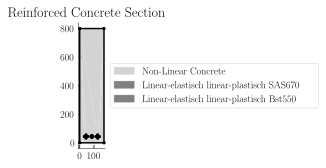

In [8]:
# initialise list to store results and list to store labels
moment_curvature_results = []
labels = []


# assign concrete material to first geometry in CompoundGeometry object
geom.geoms[0].material = conc_linear_no_tension

# create ConcreteSection object
conc_sec = ConcreteSection(geom)

# plot section first time only

conc_sec.plot_section()

# perform moment curvature analysis and store results
# bending about major axis so theta = pi/2
moment_curvature_results = conc_sec.moment_curvature_analysis(n=-0,
    theta=0, kappa_inc=2.5e-10, progress_bar=False
)


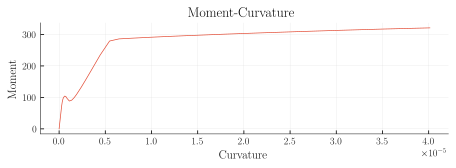

In [9]:
MomentCurvatureResults.plot_results(moment_curvature_results, fmt="-")
plt.show()